# Data cleaning & Exploratory Data Analysis

In [1]:
import requests
import time
import pandas as pd
from pandas.io.json import json_normalize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
#extrccted data twice to have a large enough sample.
d_api11 = pd.read_csv('./data/d_api_askscience.csv')
d_api21 = pd.read_csv('./data/d_api2_science.csv')

d_api12 = pd.read_csv('./data/d_api_askscience02.csv')
d_api22 = pd.read_csv('./data/d_api2_science02.csv')

In [3]:
#investigating the column contains post / title of post.
d_api11.columns

Index(['data.all_awardings', 'data.allow_live_comments',
       'data.approved_at_utc', 'data.approved_by', 'data.archived',
       'data.author', 'data.author_cakeday',
       'data.author_flair_background_color', 'data.author_flair_css_class',
       'data.author_flair_richtext', 'data.author_flair_template_id',
       'data.author_flair_text', 'data.author_flair_text_color',
       'data.author_flair_type', 'data.author_fullname',
       'data.author_patreon_flair', 'data.banned_at_utc', 'data.banned_by',
       'data.can_gild', 'data.can_mod_post', 'data.category', 'data.clicked',
       'data.content_categories', 'data.contest_mode', 'data.created',
       'data.created_utc', 'data.discussion_type', 'data.distinguished',
       'data.domain', 'data.downs', 'data.edited', 'data.gilded',
       'data.gildings.gid_1', 'data.gildings.gid_2', 'data.gildings.gid_3',
       'data.hidden', 'data.hide_score', 'data.id', 'data.is_crosspostable',
       'data.is_meta', 'data.is_original_cont

In [4]:
#investigating the column contains post / title of post.
d_api21.columns

Index(['data.all_awardings', 'data.allow_live_comments',
       'data.approved_at_utc', 'data.approved_by', 'data.archived',
       'data.author', 'data.author_flair_background_color',
       'data.author_flair_css_class', 'data.author_flair_richtext',
       'data.author_flair_template_id',
       ...
       'data.title', 'data.total_awards_received', 'data.ups', 'data.url',
       'data.user_reports', 'data.view_count', 'data.visited',
       'data.whitelist_status', 'data.wls', 'kind'],
      dtype='object', length=102)

###### **Apparently, data.title contains title of post**.

## Pre-processing

##### Below, we'll be combining data from r/askscience into a data frame 'data_as' & adding a column 'category' (which will be our target - y).

In [5]:
data_asksc01 = pd.DataFrame(d_api11['data.title'])
data_asksc02 = pd.DataFrame(d_api12['data.title'])

In [6]:
data_asksc = pd.concat([data_asksc01, data_asksc02], join='outer', axis=0)

In [7]:
data_as = data_asksc.drop_duplicates(subset='data.title').reset_index().drop('index', axis=1)
data_as['category'] = 0 #assign "0" to r/askscience
data_as.shape

(1018, 2)

In [8]:
data_as.tail()

,data.title,category
1013,"In the study of Biology, has there ever been a...",0
1014,"Why can an organ, like the cornea, lung, or a ...",0
1015,I know that all people have helpful bacteria i...,0
1016,How related is brain energy expenditure to int...,0
1017,"So if a bee can still sting after death, how l...",0


##### Below, we'll be combining data from r/science into a data frame 'data_s' & adding a column 'category' (which will be our target - y).

In [9]:
data_sc01 = pd.DataFrame(d_api21['data.title'])
data_sc02 = pd.DataFrame(d_api22['data.title'])

In [10]:
data_sc = pd.concat([data_sc01, data_sc02], join='outer', axis=0)

In [11]:
data_s = data_sc.drop_duplicates(subset='data.title').reset_index().drop('index', axis=1)
data_s['category'] = 1 #assign "1" to r/science
data_s.shape

(689, 2)

In [12]:
data_s.tail()

,data.title,category
684,Bird Embryos Vibrate to Warn One Another of Da...,1
685,Human Bycatch: Conservation Surveillance and t...,1
686,This everyday chemical was cast aside. Its rep...,1
687,Immune-orthogonal orthologs of AAV capsids and...,1
688,7% of carbon stores in central African rain fo...,1


##### Below, we'll be combining both data frame into a data frame 'data'.

In [13]:
#this it the data I'll be working on
data = pd.DataFrame(pd.concat([data_as, data_s], join='outer', axis=0))
data = data.reset_index().drop('index', axis=1)
print('data shape =', data.shape)
data.tail()

data shape = (1707, 2)


,data.title,category
1702,Bird Embryos Vibrate to Warn One Another of Da...,1
1703,Human Bycatch: Conservation Surveillance and t...,1
1704,This everyday chemical was cast aside. Its rep...,1
1705,Immune-orthogonal orthologs of AAV capsids and...,1
1706,7% of carbon stores in central African rain fo...,1


# Modelling

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
#some alternatives parameters which will be used later.
cvec = CountVectorizer(stop_words='english') #only considering stop-words
cvec2 = CountVectorizer(ngram_range=(1, 2)) #only considering ngram
cvec3 = CountVectorizer(stop_words='english', ngram_range=(1, 2)) #considering both stop-words & ngram

In [16]:
data_cv = pd.DataFrame(cvec.fit_transform(data['data.title']).todense(), columns=cvec.get_feature_names())
data_cv['y_target'] = data['category']
data_cv.tail()

,000,000ppm,000v,043,045,05,10,100,1000,101,...,zeroes,zig,zika,zinc,zombie,zone,zürich,µg,δ13c,y_target
1702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Plotting the top 15 words in each group

In [17]:
plotplot0 = data_cv[data_cv['y_target'] == 0].drop('y_target', axis=1)
df_plot0 = pd.DataFrame(plotplot0.sum().sort_values(ascending=False).head(15), columns=['count'])

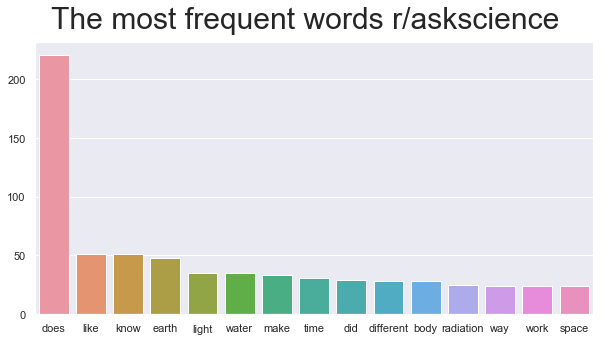

In [18]:
sns.set(style='darkgrid', font_scale=1);
plt.figure(figsize=(10,5))
sns.barplot(data=df_plot0.T)
plt.suptitle('The most frequent words r/askscience', fontsize=30);

In [19]:
plotplot1 = data_cv[data_cv['y_target'] == 1].drop('y_target', axis=1)
df_plot1 = pd.DataFrame(plotplot1.sum().sort_values(ascending=False).head(15), columns=['count'])

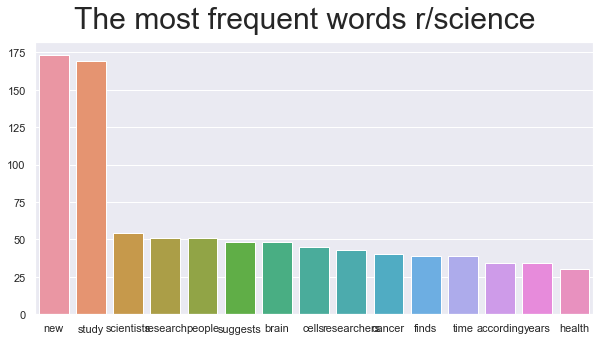

In [20]:
sns.set(style='darkgrid', font_scale=1);
plt.figure(figsize=(10,5))
sns.barplot(data=df_plot1.T)
plt.suptitle('The most frequent words r/science', fontsize=30);

# Split data into train & test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
data_t, data_h = train_test_split(data_cv, test_size=0.15, random_state=77, stratify=data['category'])
print('train data: ', data_t.shape)
print('test data: ', data_h.shape)

train data:  (1450, 6616)
test data:  (257, 6616)


# Fitting Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X_t = data_t.drop('y_target', axis=1)
y_t = data_t['y_target']
X_h = data_h.drop('y_target', axis=1)
y_h = data_h['y_target']

print('X train: ', X_t.shape)
print('y train: ', y_t.shape)
print('X test: ', X_h.shape)
print('y test: ', y_h.shape)

X train:  (1450, 6615)
y train:  (1450,)
X test:  (257, 6615)
y test:  (257,)


### BoW - stop_words

In [25]:
logreg = LogisticRegression()
logreg.fit(X_t, y_t)
y_pred = logreg.predict(X_h)
print('train score: ', logreg.score(X_t, y_t))
print('cv score: ', cross_val_score(logreg, X_t, y_t, cv=5))
print('cv score average: ', cross_val_score(logreg, X_t, y_t, cv=5).mean())
print('test score: ', logreg.score(X_h, y_h))

train score:  0.9944827586206897
cv score:  [0.86896552 0.84137931 0.85862069 0.86551724 0.83103448]
cv score average:  0.853103448275862
test score:  0.8988326848249028


In [26]:
print(confusion_matrix(y_h, y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(y_h, y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[148   5]
 [ 21  83]]
----------
True Negatives: 148
False Positives: 5
False Negatives: 21
True Positives: 83
----------
accuracy =  0.8988326848249028
miss_class =  0.10116731517509728
sensitivity =  0.7980769230769231
specificity =  0.9673202614379085
precision =  0.9431818181818182


### BoW - ngram

In [27]:
data_cv2 = pd.DataFrame(cvec2.fit_transform(data['data.title']).todense(), columns=cvec2.get_feature_names())
data_cv2['y_target'] = data['category']
data_cv2.sum().sort_values(ascending=False).head(10)

the         1381
of           964
to           857
in           743
y_target     689
and          603
is           430
that         377
how          356
are          290
dtype: int64

In [28]:
data_t2, data_h2 = train_test_split(data_cv2, test_size=0.15, random_state=77, stratify=data['category'])

In [29]:
X_t2 = data_t2.drop('y_target', axis=1)
y_t2 = data_t2['y_target']
X_h2 = data_h2.drop('y_target', axis=1)
y_h2 = data_h2['y_target']

print(X_t2.shape)
print(y_t2.shape)
print(X_h2.shape)
print(y_h2.shape)

(1450, 30197)
(1450,)
(257, 30197)
(257,)


In [30]:
logreg2 = LogisticRegression()
logreg2.fit(X_t2, y_t2)
y_pred = logreg2.predict(X_h2)
print('train score: ', logreg2.score(X_t2, y_t2))
print('cv score: ', cross_val_score(logreg2, X_t2, y_t2, cv=5))
print('cv score average: ', cross_val_score(logreg2, X_t2, y_t2, cv=5).mean())
print('test score: ', logreg2.score(X_h2, y_h2))

train score:  1.0
cv score:  [0.94827586 0.94482759 0.92413793 0.93103448 0.93103448]
cv score average:  0.9358620689655173
test score:  0.933852140077821


In [31]:
print(confusion_matrix(y_h2, y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(y_h2, y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[146   7]
 [ 10  94]]
----------
True Negatives: 146
False Positives: 7
False Negatives: 10
True Positives: 94
----------
accuracy =  0.933852140077821
miss_class =  0.06614785992217899
sensitivity =  0.9038461538461539
specificity =  0.954248366013072
precision =  0.9306930693069307


### BoW - stop-words & ngram

In [32]:
data_cv3 = pd.DataFrame(cvec3.fit_transform(data['data.title']).todense(), columns=cvec3.get_feature_names())
data_cv3['y_target'] = data['category']
data_cv3.sum().sort_values(ascending=False).head(10)

y_target      689
does          224
new           185
study         172
like           70
time           70
people         69
brain          67
scientists     65
new study      64
dtype: int64

In [33]:
data_t3, data_h3 = train_test_split(data_cv3, test_size=0.15, random_state=77, stratify=data['category'])

In [34]:
X_t3 = data_t3.drop('y_target', axis=1)
y_t3 = data_t3['y_target']
X_h3 = data_h3.drop('y_target', axis=1)
y_h3 = data_h3['y_target']

print(X_t3.shape)
print(y_t3.shape)
print(X_h3.shape)
print(y_h3.shape)

(1450, 22815)
(1450,)
(257, 22815)
(257,)


In [35]:
logreg3 = LogisticRegression()
logreg3.fit(X_t3, y_t3)
y_pred = logreg3.predict(X_h3)
print('train score: ', logreg3.score(X_t3, y_t3))
print('cv score: ', cross_val_score(logreg3, X_t3, y_t3, cv=5))
print('cv score average: ', cross_val_score(logreg3, X_t3, y_t3, cv=5).mean())
print('test score: ', logreg3.score(X_h3, y_h3))

train score:  0.9986206896551724
cv score:  [0.83103448 0.83448276 0.8137931  0.85862069 0.80689655]
cv score average:  0.8289655172413791
test score:  0.867704280155642


In [36]:
print(confusion_matrix(y_h3, y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(y_h3, y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[150   3]
 [ 31  73]]
----------
True Negatives: 150
False Positives: 3
False Negatives: 31
True Positives: 73
----------
accuracy =  0.867704280155642
miss_class =  0.13229571984435798
sensitivity =  0.7019230769230769
specificity =  0.9803921568627451
precision =  0.9605263157894737


# Hashing

In [37]:
from sklearn.feature_extraction.text import HashingVectorizer

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

## All Features

In [39]:
model = make_pipeline(HashingVectorizer(stop_words='english', ngram_range=(1, 2)), LogisticRegression())
model.fit(data['data.title'], data['category'])

Pipeline(memory=None,
     steps=[('hashingvectorizer', HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=1048576, ngram_range=(1, 2), non_negative=False,
         ...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [40]:
y_pred = model.predict(data['data.title'])
print(accuracy_score(data['category'], y_pred))

0.9572349150556532


In [41]:
print(confusion_matrix(data['category'], y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(data['category'], y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[1015    3]
 [  70  619]]
----------
True Negatives: 1015
False Positives: 3
False Negatives: 70
True Positives: 619
----------
accuracy =  0.9572349150556532
miss_class =  0.042765084944346804
sensitivity =  0.8984034833091437
specificity =  0.9970530451866405
precision =  0.9951768488745981


## 65k Features

In [42]:
model = make_pipeline(HashingVectorizer(stop_words='english', ngram_range=(1, 2), n_features=2**16), LogisticRegression())
model.fit(data['data.title'], data['category'])
y_pred = model.predict(data['data.title'])
print(accuracy_score(data['category'], y_pred))
print("Number of features:", 2**16)

0.9589923842999414
Number of features: 65536


In [43]:
print(confusion_matrix(data['category'], y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(data['category'], y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[1014    4]
 [  66  623]]
----------
True Negatives: 1014
False Positives: 4
False Negatives: 66
True Positives: 623
----------
accuracy =  0.9589923842999414
miss_class =  0.041007615700058585
sensitivity =  0.9042089985486212
specificity =  0.9960707269155207
precision =  0.9936204146730463


## 10k Features

In [44]:
model = make_pipeline(HashingVectorizer(stop_words='english', ngram_range=(1, 2), n_features=10000), LogisticRegression())
model.fit(data['data.title'], data['category'])
y_pred = model.predict(data['data.title'])
print(accuracy_score(data['category'], y_pred))
print("Number of features:", 10000)

0.9402460456942003
Number of features: 10000


In [45]:
print(confusion_matrix(data['category'], y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(data['category'], y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[1009    9]
 [  93  596]]
----------
True Negatives: 1009
False Positives: 9
False Negatives: 93
True Positives: 596
----------
accuracy =  0.9402460456942003
miss_class =  0.05975395430579965
sensitivity =  0.865021770682148
specificity =  0.9911591355599214
precision =  0.9851239669421488


## 5k Features

In [46]:
model = make_pipeline(HashingVectorizer(stop_words='english', ngram_range=(1, 2), n_features=5000), LogisticRegression())
model.fit(data['data.title'], data['category'])
y_pred = model.predict(data['data.title'])
print(accuracy_score(data['category'], y_pred))
print("Number of features:", 5000)

0.9291154071470415
Number of features: 5000


In [47]:
print(confusion_matrix(data['category'], y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(data['category'], y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[1009    9]
 [ 112  577]]
----------
True Negatives: 1009
False Positives: 9
False Negatives: 112
True Positives: 577
----------
accuracy =  0.9291154071470415
miss_class =  0.07088459285295841
sensitivity =  0.8374455732946299
specificity =  0.9911591355599214
precision =  0.984641638225256


## 1k Features

In [48]:
model = make_pipeline(HashingVectorizer(stop_words='english', ngram_range=(1, 2), n_features=1000), LogisticRegression())
model.fit(data['data.title'], data['category'])
y_pred = model.predict(data['data.title'])
print(accuracy_score(data['category'], y_pred))
print("Number of features:", 1000)

0.8699472759226714
Number of features: 1000


In [49]:
print(confusion_matrix(data['category'], y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(data['category'], y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[981  37]
 [185 504]]
----------
True Negatives: 981
False Positives: 37
False Negatives: 185
True Positives: 504
----------
accuracy =  0.8699472759226714
miss_class =  0.13005272407732865
sensitivity =  0.7314949201741655
specificity =  0.9636542239685658
precision =  0.9316081330868762


## 6615 Features

In [50]:
model = make_pipeline(HashingVectorizer(stop_words='english', ngram_range=(1, 2), n_features=6615), LogisticRegression())
model.fit(data['data.title'], data['category'])
y_pred = model.predict(data['data.title'])
print(accuracy_score(data['category'], y_pred))
print("Number of features:", 6615)

0.9414176918570591
Number of features: 6615


In [51]:
print(confusion_matrix(data['category'], y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(data['category'], y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[1009    9]
 [  91  598]]
----------
True Negatives: 1009
False Positives: 9
False Negatives: 91
True Positives: 598
----------
accuracy =  0.9414176918570591
miss_class =  0.05858230814294083
sensitivity =  0.8679245283018868
specificity =  0.9911591355599214
precision =  0.985172981878089


## TFIDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
model = make_pipeline(TfidfVectorizer(stop_words='english', sublinear_tf=True, max_df=0.5, max_features=15000), LogisticRegression())
model.fit(data['data.title'], data['category'])
y_pred = model.predict(data['data.title'])
print(accuracy_score(data['category'], y_pred))
print("Number of features:", len(model.steps[0][1].get_feature_names()))

0.9607498535442296
Number of features: 6615


In [54]:
print(confusion_matrix(data['category'], y_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(data['category'], y_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[1016    2]
 [  65  624]]
----------
True Negatives: 1016
False Positives: 2
False Negatives: 65
True Positives: 624
----------
accuracy =  0.9607498535442296
miss_class =  0.03925014645577036
sensitivity =  0.9056603773584906
specificity =  0.9980353634577603
precision =  0.9968051118210862


# Naive Bayes - Multinomial

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
print(X_t.shape)
print(y_t.shape)

(1450, 6615)
(1450,)


In [57]:
nb = MultinomialNB()
multi_nb = nb.fit(X_t, y_t)
print('Multinomial NB Score - train: ', multi_nb.score(X_t, y_t))
print('Multinomial NB Score - test: ', multi_nb.score(X_h, y_h))

Multinomial NB Score - train:  0.9772413793103448
Multinomial NB Score - test:  0.8560311284046692


In [58]:
multi_nb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
multi_nb_pred = multi_nb.predict(X_h)
#multi_nb_error = abs(y_h - multi_nb_pred)
#multi_nb_error.sum()

In [60]:
print(confusion_matrix(y_h, multi_nb_pred))
print('----------')
tn, fp, fn, tp = confusion_matrix(y_h, multi_nb_pred).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)
print('----------')
accuracy = (tp+tn)/(tp+fp+tn+fn)
miss_class = (fp+fn)/(tp+fp+tn+fn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)
print('accuracy = ', accuracy)
print('miss_class = ', miss_class)
print('sensitivity = ', sensitivity)
print('specificity = ', specificity)
print('precision = ', precision)

[[133  20]
 [ 17  87]]
----------
True Negatives: 133
False Positives: 20
False Negatives: 17
True Positives: 87
----------
accuracy =  0.8560311284046692
miss_class =  0.14396887159533073
sensitivity =  0.8365384615384616
specificity =  0.869281045751634
precision =  0.8130841121495327


In [61]:
#cm_nb = pd.DataFrame(confusion_matrix(y_h, multi_nb_pred),
#                     index=['actual askscience', 'actual science'],
#                     columns=['pred askscience', 'pred science'])
#cm_nb

# Result Summary
|Model|data|accuracy|miss_class|sensitivity|specificity|precision|note|
|---|---|---|---|---|---|---|---|
|Multinomial Naïve Bayes|test|0.856|0.1439|0.8365|0.8693|0.8131|score on test data|
|Log-reg; Bag of Words - stop_word|test|0.8988|0.1012|0.7981|0.9673|0.9432|score on test data|
|Log-reg; Bag of Words - ngram (range: 1-2)|test|0.9339|0.0661|0.9038|0.9542|0.9307|score on test data|
|Log-reg; Bag of Words - stop-word & ngram (range: 1-2)|test|0.8677|0.1323|0.7019|0.9804|0.9605|score on test data|
|Hashing - stop-word & ngram (range: 1-2), all features|all|0.9572|0.0428|0.8984|0.9971|0.9952|score on all data - no train-test split|
|Hashing - stop-word & ngram (range: 1-2), 65k features|all|0.9589|0.041|0.9042|0.9961|0.9936|score on all data - no train-test split|
|Hashing - stop-word & ngram (range: 1-2), 10k features|all|0.9402|0.0598|0.865|0.9912|0.9851|score on all data - no train-test split|
|Hashing - stop-word & ngram (range: 1-2), 5k features|all|0.9291|0.0709|0.8374|0.9912|0.9846|score on all data - no train-test split|
|Hashing - stop-word & ngram (range: 1-2), 1k features|all|0.8699|0.13|0.7315|0.9637|0.9316|score on all data - no train-test split|
|Hashing - stop-word & ngram (range: 1-2), 6615 features|all|0.9414|0.0586|0.8679|0.9912|0.9852|score on all data - no train-test split|
|Log-reg; TFIDF - stop-word, 6615 features|all|0.9607|0.0392|0.9057|0.998|0.9968|score on all data - no train-test split|